# 1. Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Thu thập dữ liệu

### Dữ liệu thuộc chủ đề gì và lấy từ nguồn nào?
* [Dữ liệu](https://www.kaggle.com/bcruise/data-scientist-salary-eda/data) sử dụng trong đồ án được lấy từ trang Kaggle thu thập các thông tin về "Data scientist salary".
 

# 3. KHÁM PHÁ DỮ LIỆU

### Đọc dữ liệu từ file csv vào dataframes

In [2]:
project_dataframe= pd.read_csv('data_cleaned_2021.csv',index_col='index')
project_dataframe.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
index,,,,,,,,,,,,,,,,,,,,,
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows, num_cols= project_dataframe.shape
print('Number of rows: ', num_rows)
print('Number of columns: ', num_cols)

Number of rows:  742
Number of columns:  41


### Mỗi dòng có ý nghĩa gì? 

Mỗi dòng chứa các thông tin về mức lương tối thiểu/ tối đa/ trung bình, mô tả công việc, tuổi công ty,....
Các giá trị -1 nghĩa là thông tin không có sẵn.

### Có vấn đề các dòng có ý nghĩa khác nhau không?

Nhìn tổng quan, các dòng đều giống nhau về ý nghĩa.

### Dữ liệu có các dòng bị lặp không?

In [4]:
duplicated_rows=project_dataframe.duplicated().any()
print('Have duplicated rows: ',duplicated_rows)
# Xóa các dòng bị lặp
project_dataframe.drop_duplicates(inplace=True)

# Số dòng và số cột sau khi xóa các dòng bị lặp
num_rows, num_cols = project_dataframe.shape
print('Number of rows: ', num_rows)
print('Number of columns: ', num_cols)

Have duplicated rows:  True
Number of rows:  467
Number of columns:  41


### Mỗi cột có ý nghĩa gì?

In [6]:
Salary_data_descript=pd.read_csv('Data_description/Data_salary_description.csv',sep=',')

pd.set_option('display.max_colwidth',None)
Salary_data_descript

,Columns,description
0,Index,id
1,Job Title,The title of job
2,Salary Estimate,Range of salary and the source
3,Job Description,Tells us what qualities that company want and what is expected out of the job title
4,Rating,rating of the company
5,Company Name,Name of the company
6,Location,Location of the job
7,Headquarters,Location of headquarter of the company
8,Size,Range of number of employee working in the company
9,Founded,Company founded in year


### Mỗi cột hiện đang có kiểu dữ liệu gì? 

In [7]:
project_dataframe.dtypes

Job Title              object
Salary Estimate        object
Job Description        object
Rating                float64
Company Name           object
Location               object
Headquarters           object
Size                   object
Founded                 int64
Type of ownership      object
Industry               object
Sector                 object
Revenue                object
Competitors            object
Hourly                  int64
Employer provided       int64
Lower Salary            int64
Upper Salary            int64
Avg Salary(K)         float64
company_txt            object
Job Location           object
Age                     int64
Python                  int64
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
keras                   int64
pytorch                 int64
scikit                  int64
tensor                  int64
hadoop                  int64
tableau   

Các cột dữ liệu đang có type là "Object", kiểm tra các kiểu dữ liệu tồn tại trong nội bộ các cột.

In [8]:
def type_(value):
    return type(value)
def check_type(s):
    dtypes = set()
    h=s.apply(type_)
    dtypes=set(h)
    return dtypes
col_name=project_dataframe.columns

df_Types=[]
for i in col_name:
    df_Types.append(check_type(project_dataframe[i]))
for i in range(len(col_name)):
    print("dtype of ",col_name[i]," :",df_Types[i])

dtype of  Job Title  : {<class 'str'>}
dtype of  Salary Estimate  : {<class 'str'>}
dtype of  Job Description  : {<class 'str'>}
dtype of  Rating  : {<class 'float'>}
dtype of  Company Name  : {<class 'str'>}
dtype of  Location  : {<class 'str'>}
dtype of  Headquarters  : {<class 'str'>}
dtype of  Size  : {<class 'str'>}
dtype of  Founded  : {<class 'int'>}
dtype of  Type of ownership  : {<class 'str'>}
dtype of  Industry  : {<class 'str'>}
dtype of  Sector  : {<class 'str'>}
dtype of  Revenue  : {<class 'str'>}
dtype of  Competitors  : {<class 'str'>}
dtype of  Hourly  : {<class 'int'>}
dtype of  Employer provided  : {<class 'int'>}
dtype of  Lower Salary  : {<class 'int'>}
dtype of  Upper Salary  : {<class 'int'>}
dtype of  Avg Salary(K)  : {<class 'float'>}
dtype of  company_txt  : {<class 'str'>}
dtype of  Job Location  : {<class 'str'>}
dtype of  Age  : {<class 'int'>}
dtype of  Python  : {<class 'int'>}
dtype of  spark  : {<class 'int'>}
dtype of  aws  : {<class 'int'>}
dtype of 

Nhìn chung thì các cột chỉ có duy nhất một kiểu dữ liệu. 

### Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?



Suy nghĩ: 
* Có một số cột chưa phù hợp hoặc cần thiết cho việc tính toán, ta có thể xử lý dữ liệu trong quá trình trả lời câu hỏi.
* Cột "Salary Estimate" khá quan trọng nhưng nó chưa có dạng dữ liệu phù hợp, nó có ý nghĩa là giá trị lương trong một khoảng nào đó. 
* Trong đồ án này, ta sẽ thực hiện 2 việc với cột này:
   + Tạo 1 cột "avarage salary" lưu giữ giá trị lương trung bình
   + Đưa cột "Salary Estimate" về 1 array có dạng \[min_salary, max_salary\] để dùng cho việc trả lời câu hỏi sau này

1. Đưa cột "Salary Estimate" về 1 array có dạng \[min_salary, max_salary\]

In [9]:
character_remove=["Glassdoor est.","K","−"]


#chỉ lấy khoảng giá trị, bỏ nguồn  ví dụ  [$53K-$91K , Glassdoor est.)]  bỏ  Glassdoor est.)
project_dataframe['Salary Estimate']=project_dataframe['Salary Estimate'].str.split(" ").str[0]   #.str[0]



project_dataframe['Salary Estimate']=project_dataframe['Salary Estimate'].str.replace("K",'',regex= False) 
project_dataframe['Salary Estimate']=project_dataframe['Salary Estimate'].str.replace("-",',',regex=False)
project_dataframe['Salary Estimate']=project_dataframe['Salary Estimate'].str.replace("$",'',regex=False)



def change_narray(s):
    s=s.split(",")
    try:     
        s=np.array(s,dtype=float)
     # có 1 số dòng là ngoại lệ nên không thể xử lý được theo cách trên, 
    #  ta gán giá trị bằng 0 và loại bỏ các dòng này ra khỏi dữ liệu
    except ValueError:  
        s=np.nan
    return s

project_dataframe['Salary Estimate']=project_dataframe['Salary Estimate'].apply(change_narray)



# #loại bỏ các dòng =0
index_removed=project_dataframe['Salary Estimate'][project_dataframe['Salary Estimate'].isna()==True].index

project_dataframe=project_dataframe.drop(index_removed)

Sau khi xử lý, cột "salary estimate" đang giữ khoảng lương [min,max]

2. Tạo 1 cột "avarage salary" lưu giữ giá trị lương trung bình

In [11]:
def avarage_salary(s):
    return s[0]/2 + s[1]/2
project_dataframe['Avarage salary']=project_dataframe['Salary Estimate'].apply(avarage_salary)

Theo như mô tả của file dữ liệu thì:
> Salary Estimate: Range of salary and the source

> Avg Salary(K): Average salary reported for the job in a particular company.

Nhóm có tính thêm cột "Avarage salary" là trung bình của cột "Salary Estimate" (lấy hai con số trong cột này cộng lại rồi chia trung bình)

In [12]:
# So sánh hai cột "Avarage salary" và "Avg Salary(K)"
s = project_dataframe['Avarage salary'] == project_dataframe["Avg Salary(K)"]
s.all()

False

In [13]:
# Có vài dòng trong hai cột này không có giá trị giống nhau.
project_dataframe[s == False][["Avarage salary","Avg Salary(K)"]]

,Avarage salary,Avg Salary(K)
index,,
197,20.5,42.0
209,27.5,56.5
240,21.5,44.5
247,27.5,56.5
257,20.0,41.5
437,31.5,65.0
522,25.0,51.5
523,13.5,27.5
823,37.0,76.5


### Loại bỏ các cột không sử dụng đến

Nhóm sẽ bỏ đi một vài cột không cần thiết như: ```Job Description```, ```Company Name```,```Job Location```, ```Age```, ```Competitors```,```Hourly```,```Employer provided```.

In [14]:
project_dataframe.drop(['Job Description','Company Name','Competitors','Employer provided','Hourly',\
            'Job Location','Age']\
            ,axis=1, inplace=True)
project_dataframe.head()

,Job Title,Salary Estimate,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Avarage salary
index,,,,,,,,,,,,,,,,,,,,,
0,Data Scientist,"[53.0, 91.0]",3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,...,0,1,1,0,0,0,data scientist,na,M,72.0
1,Healthcare Data Scientist,"[63.0, 112.0]",3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,...,0,0,0,0,0,0,data scientist,na,M,87.5
2,Data Scientist,"[80.0, 90.0]",4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,...,0,0,0,0,0,0,data scientist,na,M,85.0
3,Data Scientist,"[56.0, 97.0]",3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",...,0,0,0,0,0,0,data scientist,na,na,76.5
4,Data Scientist,"[86.0, 143.0]",2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,...,0,0,0,0,0,0,data scientist,na,na,114.5


### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?


• Min? max? 

→ Có gì bất thường không?

In [26]:
# những cột dữ liệu dạng số thuần túy
num_col_profile = project_dataframe[['Rating','Lower Salary','Upper Salary','Avg Salary(K)']]

# những cột dữ liệu yêu cầu kỹ năng này cho công việc (1 là cần, 0 là không cần thiết cho công việc)
skill_col_profile = project_dataframe[['Python','spark','aws','excel','sql','sas','keras','pytorch','scikit','tensor',\
                            'hadoop','tableau','bi','flink','mongo','google_an']]

In [27]:
num_col_profile.describe()

,Rating,Lower Salary,Upper Salary,Avg Salary(K)
count,450.000000,450.000000,450.000000,450.000000
mean,3.700444,73.333333,127.831111,100.582222
std,0.604917,27.980983,43.064802,35.150835
min,-1.000000,20.000000,35.000000,27.500000
25%,3.400000,53.000000,97.250000,75.625000
50%,3.700000,69.000000,124.000000,96.750000
75%,4.075000,87.750000,150.000000,120.875000
max,5.000000,202.000000,306.000000,254.000000


- Có bất thường tại min của cột rating (xem nguyên nhân và xử lý). Theo mô tả tập dữ liệu, các giá trị thiếu được thay thế bằng -1, nhóm sẽ điền giá trị mean thay thế cho giá trị -1.

In [28]:
project_dataframe[project_dataframe["Rating"] == -1]

,Job Title,Salary Estimate,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Avarage salary
index,,,,,,,,,,,,,,,,,,,,,
583,Data Scientist,"[81.0, 140.0]",-1.0,"New York, NY","Noida, India",unknown,-1,Company - Private,-1,-1,...,0,0,0,0,0,0,data scientist,na,M,110.5


Chỉ có một dòng bị thiếu dữ liệu, nhóm sẽ thay thế giá trị bị thiếu bằng giá trị mean.

In [29]:
pd.options.mode.chained_assignment = None # default='warn'

index_replace=num_col_profile["Rating"][num_col_profile["Rating"]==-1].index

num_col_profile.loc[index_replace,"Rating"]=3.7
num_col_profile.describe()

,Rating,Lower Salary,Upper Salary,Avg Salary(K)
count,450.000000,450.000000,450.000000,450.000000
mean,3.710889,73.333333,127.831111,100.582222
std,0.562679,27.980983,43.064802,35.150835
min,1.900000,20.000000,35.000000,27.500000
25%,3.400000,53.000000,97.250000,75.625000
50%,3.700000,69.000000,124.000000,96.750000
75%,4.075000,87.750000,150.000000,120.875000
max,5.000000,202.000000,306.000000,254.000000


• Số-lượng/tỉ-lệ các giá trị thiếu?

In [30]:
# tỉ lệ các giá trị thiếu
def missing_percent(s):
    missing_count=  missing_count=s.isna().sum() + s[s==-1].count()
    result=float(missing_count)/float(s.shape[0]) * float(100)
    return result

col_name=num_col_profile.columns
missing_ratio=[]
for i in col_name:
    missing=missing_percent(project_dataframe[i])
    print("{", i, ": ",missing, "}")

col_name=skill_col_profile.columns
missing_ratio=[]
for i in col_name:
    missing=missing_percent(project_dataframe[i])
    print("{", i, ": ",missing, "}")

{ Rating :  0.2222222222222222 }
{ Lower Salary :  0.0 }
{ Upper Salary :  0.0 }
{ Avg Salary(K) :  0.0 }
{ Python :  0.0 }
{ spark :  0.0 }
{ aws :  0.0 }
{ excel :  0.0 }
{ sql :  0.0 }
{ sas :  0.0 }
{ keras :  0.0 }
{ pytorch :  0.0 }
{ scikit :  0.0 }
{ tensor :  0.0 }
{ hadoop :  0.0 }
{ tableau :  0.0 }
{ bi :  0.0 }
{ flink :  0.0 }
{ mongo :  0.0 }
{ google_an :  0.0 }


In [36]:
# số lượng công việc yêu cầu có một kĩ năng nào đó
df = skill_col_profile.agg([pd.Series.value_counts])
df

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0,197,342,343,211,200,408,432,427,415,403,371,354,412,442,427,442
1,253,108,107,239,250,42,18,23,35,47,79,96,38,8,23,8


In [37]:
# Chuyển mỗi cột về dạng %
def count_percentile(s):
    return s / s.sum() * 100
df = df.apply(count_percentile,axis=0)

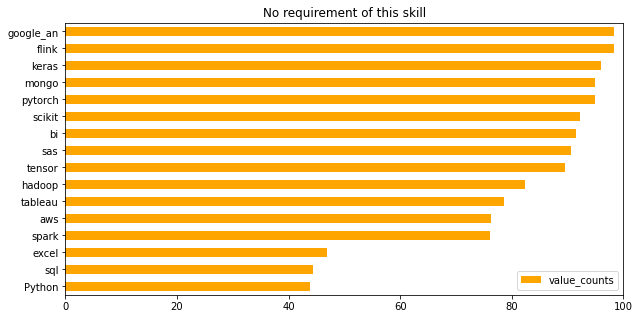

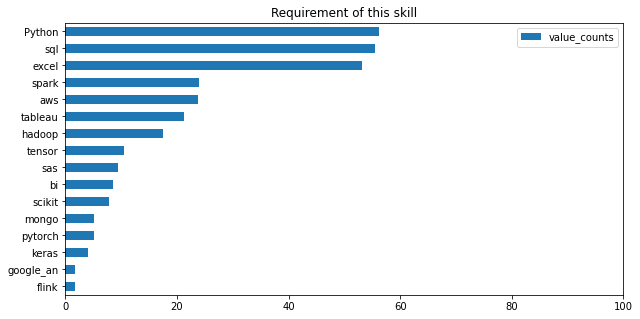

In [46]:
df.iloc[0].unstack(1).sort_values('value_counts').plot.barh(figsize=(10,5),color="orange")
plt.title("No requirement of this skill");
plt.xlim(0,100)
df.iloc[1].unstack(1).sort_values('value_counts').plot.barh(figsize=(10,5),)
plt.xlim(0,100)
plt.title("Requirement of this skill");

**Nhận xét:**
- Số kĩ năng không cần thiết chiếm khá nhiều như: google_an, flink, keras, mongo, pytorch, scikit, bi, sas, tensor, hadoop, tableau, aws, spark (các kĩ năng này không cần thiết trong hơn 60% công việc của tập dữ liệu).
- Có vẻ như những công việc trong tập dữ liệu chỉ cần yêu cầu kĩ năng ở mức cở bản như python, sql, excel. Hơn 20% công việc yêu cầu thêm một số kỹ năng như spark, aws, tableau, hadoop. Những yêu cầu về các kĩ năng còn lại đều ở mức dưới 20%.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?
• Số-lượng/tỉ-lệ các giá trị thiếu?

• Số lượng các giá trị khác nhau? Show một vài giá trị

→ Có gì bất thường không?

- Các cột có kiểu dữ liệu dạng phân loại (categorical) là: ```Job Title```, ```Salary Estimate```, ```Location```, ```Headquarters```, ```Size```, ```Type of ownership```, ```Industry```,```Sector```, ```Revenue```, ```company_txt```, ```job_title_sim```, ```seniority_by_title```, ```Degree```.
- Cần chuyển những cột dữ liệu dạng phân loại sau thành dạng số: ```Salary Estimate```, ```Size```, ```Revenue```.

In [47]:
cate_col_profile = project_dataframe[['Job Title','Location', 'Headquarters','Type of ownership', 'Industry','Sector',\
                          'company_txt', 'job_title_sim', 'seniority_by_title', 'Degree']]

In [48]:
cate_col_profile.head()

,Job Title,Location,Headquarters,Type of ownership,Industry,Sector,company_txt,job_title_sim,seniority_by_title,Degree
index,,,,,,,,,,
0,Data Scientist,"Albuquerque, NM","Goleta, CA",Company - Private,Aerospace & Defense,Aerospace & Defense,Tecolote Research,data scientist,na,M
1,Healthcare Data Scientist,"Linthicum, MD","Baltimore, MD",Other Organization,Health Care Services & Hospitals,Health Care,University of Maryland Medical System,data scientist,na,M
2,Data Scientist,"Clearwater, FL","Clearwater, FL",Company - Private,Security Services,Business Services,KnowBe4,data scientist,na,M
3,Data Scientist,"Richland, WA","Richland, WA",Government,Energy,"Oil, Gas, Energy & Utilities",PNNL,data scientist,na,na
4,Data Scientist,"New York, NY","New York, NY",Company - Private,Advertising & Marketing,Business Services,Affinity Solutions,data scientist,na,na


In [49]:
#tính giá trị thiếu, loại bỏ giá trị thiếu
def missing_percent(s):
    missing_count=s.isnull().sum() 
    result=float(missing_count)/float(s.shape[0]) * float(100)
    return result

col_name=cate_col_profile.columns
missing_ratio=[]
for i in col_name:
    missing=missing_percent(cate_col_profile[i])
    print("{", i, ": ",missing, "}")

{ Job Title :  0.0 }
{ Location :  0.0 }
{ Headquarters :  0.0 }
{ Type of ownership :  0.0 }
{ Industry :  0.0 }
{ Sector :  0.0 }
{ company_txt :  0.0 }
{ job_title_sim :  0.0 }
{ seniority_by_title :  0.0 }
{ Degree :  0.0 }


In [51]:
# những giá trị đặc trưng của mỗi cột dữ liệu
def diff_vals(s):
    return s.unique()
def num_diff_val(s):
    return s.nunique()

cate_col_profile = cate_col_profile.agg([diff_vals,num_diff_val],axis=0)

,Job Title,Location,Headquarters,Type of ownership,Industry,Sector,company_txt,job_title_sim,seniority_by_title,Degree
diff_vals,"[Data Scientist, Healthcare Data Scientist, Research Scientist, Staff Data Scientist - Technology, Data Analyst, Data Engineer I, Scientist I/II, Biology, Customer Data Scientist, Data Scientist - Health Data Analytics, Senior Data Scientist / Machine Learning, Data Scientist - Quantitative, Digital Health Data Scientist, Associate Data Analyst, Clinical Data Scientist, Data Scientist / Machine Learning Expert, Web Data Analyst, Senior Data Scientist, Data Engineer, Data Scientist - Algorithms & Inference, Scientist, Lead Data Scientist, Spectral Scientist/Engineer, College Hire - Data Scientist - Open to December 2019 Graduates, Data Scientist, Office of Data Science, Data Science Analyst, Senior Risk Data Scientist, Data Scientist in Artificial Intelligence Early Career, Data Scientist - Research, R&D Data Analysis Scientist, Analytics Consultant, Director, Data Science, Data Scientist SR, R&D Sr Data Scientist, Customer Data Scientist/Sales Engineer (Bay, Jr. Business Data Analyst, Data Management Specialist, E-Commerce Data Analyst, Sr. Scientist II, Insurance Data Scientist, Data Modeler, Data Analyst / Scientist, Data Scientist, Rice University, Financial Data Analyst, Senior Data Analyst, Ag Data Scientist, Data Scientist II, Senior Data Engineer, Project Scientist, Data Analytics Manager, Senior Machine Learning (ML) Engineer / Data Scientist - Cyber Security Analytics, Associate Scientist, Scientist 2, QC Viral Vector, Machine Learning Engineer, Data Scientist/ML Engineer, Sr. Data Scientist, Data Engineer 4 - Contract, Data Analyst - Asset Management, Senior Research Scientist - Embedded System Development for DevOps, Data Scientist - Bioinformatics, Customer Data Scientist/Sales Engineer, MongoDB Data Engineer II, Senior Data Scientist Statistics, Senior Spark Engineer (Data Science), BI & Platform Analytics Manager, Sr. Data Scientist - Analytics, Personalized Healthcare (PHC), Pricipal Scientist Molecular and cellular biologist, Data Scientist (Actuary, FSA or ASA), Staff Data Scientist, Data Engineer 5 - Contract (Remote), Senior Scientist - Neuroscience, Medical Lab Scientist, Risk and Analytics IT, Data Scientist, Scientist, Analytical Development, Analytics Manager, Digital Marketing & ECommerce Data Analyst, Sr. Scientist - Digital & Image Analysis/Computational Pathology, Principal Scientist - Immunologist, MED TECH/LAB SCIENTIST - LABORATORY, Sr. Scientist, Quantitative Translational Sciences, Sr. Data Scientist II, Excel / VBA / SQL Data Analyst, Machine Learning Research Scientist, VP, Data Science, Radar Data Analyst, PL Actuarial-Lead Data Scientist, PV Scientist, Senior Data & Machine Learning Scientist, Principal Data Scientist (Computational Chemistry), Principal Scientist, Chemistry & Immunology, Software Engineer - Data Visualization, Scientist/Senior Scientist, Autoimmune, Staff Machine Learning Engineer, Principal Scientist, Hematology, Marketing Data Analyst, Medical Laboratory Scientist, R&D Specialist/ Food Scientist, Senior Research Scientist-Machine Learning, Analytics Manager - Data Mart, Sr. Data Engineer - Contract-to-Hire (Java), MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB, ...]","[Albuquerque, NM, Linthicum, MD, Clearwater, FL, Richland, WA, New York, NY, Dallas, TX, Baltimore, MD, San Jose, CA, Rochester, NY, Chantilly, VA, Plano, TX, Seattle, WA, Cambridge, MA, Newark, NJ, Mountain View, CA, San Francisco, CA, Denver, CO, Chicago, IL, Louisville, KY, Herndon, VA, Hillsboro, OR, Worcester, MA, Groton, CT, Detroit, MI, Sunnyvale, CA, Ipswich, MA, Redlands, CA, Woburn, MA, Fremont, CA, Long Beach, NY, Marlborough, MA, Allendale, NJ, Bellevue, WA, Longmont, CO, Beavercreek, OH, Peoria, IL, Fort Lauderdale, FL, Boston, MA, Huntsville, AL, Armonk, NY, San Diego, CA, Saint Louis, MO, Cincinnati, OH, Palo Alto, CA, Coraopolis, PA, Framingham, MA, Atlanta, GA, Philade

# 4. Đưa ra các câu hỏi có ý nghĩa cần trả lời

**Câu hỏi**
- Mối liên hệ giữa rating và mức lương cao nhất, thấp nhất trong mỗi lĩnh vực là như thế nào?

# 5.Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

In [53]:
# mỗi lĩnh vực sẽ tương ứng với một giá trị trong cột "job_title_sim"
# coi trước các giá trị trong cột "job_title_sim"
project_dataframe["job_title_sim"].unique()

array(['data scientist', 'other scientist', 'analyst', 'data engineer',
       'data analitics', 'na', 'data modeler',
       'Data scientist project manager', 'machine learning engineer',
       'director'], dtype=object)

In [55]:
# chọn các cột cần thiết để xử lý
job_salary_df = project_dataframe[['job_title_sim','Rating','Lower Salary','Upper Salary']]
job_salary_df["Rating"] = num_col_profile["Rating"]
job_salary_df.describe()

,Rating,Lower Salary,Upper Salary
count,450.000000,450.000000,450.000000
mean,3.710889,73.333333,127.831111
std,0.562679,27.980983,43.064802
min,1.900000,20.000000,35.000000
25%,3.400000,53.000000,97.250000
50%,3.700000,69.000000,124.000000
75%,4.075000,87.750000,150.000000
max,5.000000,202.000000,306.000000


In [56]:
# xóa các dòng có "job_title_sim" là "other scientist" hoặc "na"
job_salary_df = job_salary_df[job_salary_df["job_title_sim"] != "other scientist"]
job_salary_df = job_salary_df[job_salary_df["job_title_sim"] != "na"]
job_salary_df["job_title_sim"].unique()

array(['data scientist', 'analyst', 'data engineer', 'data analitics',
       'data modeler', 'Data scientist project manager',
       'machine learning engineer', 'director'], dtype=object)

**Gom nhóm theo từng job_title_sim và nhận xét về mức lương trong từng lĩnh vực**

In [57]:
job_salary_df.groupby("job_title_sim").size()

job_title_sim
Data scientist project manager      8
analyst                            70
data analitics                      5
data engineer                      71
data modeler                        4
data scientist                    204
director                            3
machine learning engineer          11
dtype: int64

Nhìn vào thống kê của mỗi nhóm trong "job_title_sim" thì chúng ta sẽ xem xét mối liên hệ giữa "Rating" với "Upper Salary" và "Lower Salary" trong các ngành: "analyst", "data engineer", "data scientist" bằng cách vẽ đồ thị để biểu hiện sự tương quan (do các nhóm này có nhiều dữ liệu hơn).

ANALYST


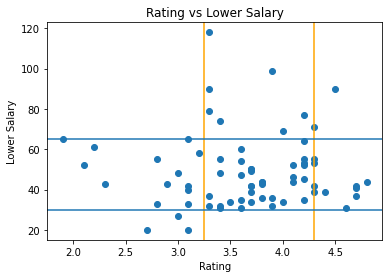

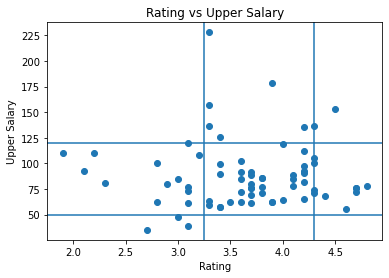

In [75]:
# lấy ra những dòng có job_title_sim là analyst
analyst_df = job_salary_df[job_salary_df["job_title_sim"] == "analyst"]

# vẽ đồ thị
plt.scatter(analyst_df["Rating"],analyst_df["Lower Salary"])
plt.xlabel("Rating")
plt.ylabel("Lower Salary")
plt.title("Rating vs Lower Salary");
plt.axvline(3.25,color='orange'); plt.axvline(4.3,color='orange'); plt.axhline(30); plt.axhline(65);
plt.figure()
plt.scatter(analyst_df["Rating"],analyst_df["Upper Salary"])
plt.xlabel("Rating")
plt.ylabel("Upper Salary")
plt.axvline(3.25); plt.axvline(4.3); plt.axhline(50); plt.axhline(120);
plt.title("Rating vs Upper Salary");
print("ANALYST")

- Nhìn chung thì hai biểu đồ có vẻ khá giống nhau.
- Với công việc là analyst thì các điểm tập trung nhiều trong Rating từ 3.25 đến 4.3.
- Lower Salary xuất hiện nhiều trong khoảng từ 30 đến 65.
- Upper Salary xuất hiện nhiều trong khoảng từ 50 đến 120.

DATA ENGINEER


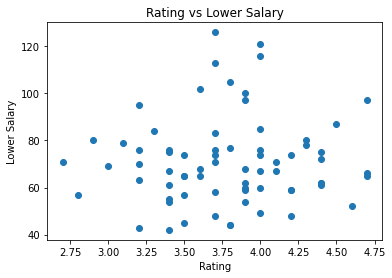

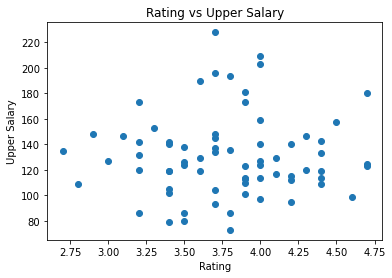

In [72]:
# với công việc là data engineer thì làm tương tự như analyst.
# lấy ra những dòng có job_title_sim là scientist
engineer_df = job_salary_df[job_salary_df["job_title_sim"] == "data engineer"]

# vẽ đồ thị
plt.scatter(engineer_df["Rating"],engineer_df["Lower Salary"])
plt.xlabel("Rating")
plt.ylabel("Lower Salary")
plt.title("Rating vs Lower Salary");

plt.figure()
plt.scatter(engineer_df["Rating"],engineer_df["Upper Salary"])
plt.xlabel("Rating")
plt.ylabel("Upper Salary")
plt.title("Rating vs Upper Salary");

print("DATA ENGINEER")

- Các điểm dữ liệu có vẻ khá rời rạc.
- Một số rating có nhiều điểm dữ liệu hơn so với các rating khác như các điểm rating trong khoảng từ 3.25 tới 4.5 thì nhiều dữ liệu hơn.
- Đặc biệt các điểm rating từ 3.25 đến 3.6 và từ 4.0 đến 4.5 thì mức lương có vẻ gần nhau hơn, các điểm rating trong khoảng 3.75 $\pm$ 0.5 thì mức lương có vẻ đa dạng hơn.

DATA SCIENTIST


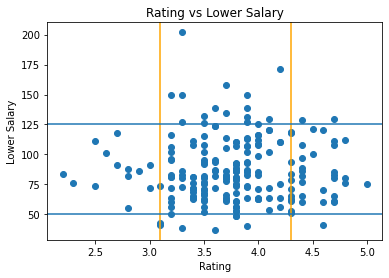

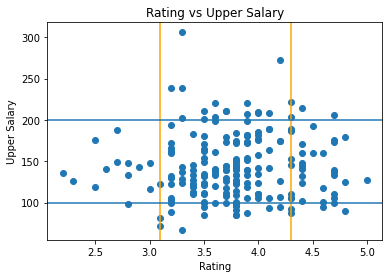

In [77]:
# với công việc là data scientist thì làm tương tự như analyst.
# lấy ra những dòng có job_title_sim là data scientist
df = job_salary_df[job_salary_df["job_title_sim"] == "data scientist"]

# vẽ đồ thị
plt.scatter(df["Rating"],df["Lower Salary"])
plt.xlabel("Rating")
plt.ylabel("Lower Salary")
plt.title("Rating vs Lower Salary");
plt.axvline(3.1,color='orange'); plt.axvline(4.3,color='orange'); plt.axhline(50); plt.axhline(125);
plt.figure()
plt.scatter(df["Rating"],df["Upper Salary"])
plt.xlabel("Rating")
plt.ylabel("Upper Salary")
plt.title("Rating vs Upper Salary");
plt.axvline(3.1,color='orange'); plt.axvline(4.3,color='orange'); plt.axhline(100); plt.axhline(200);
print("DATA SCIENTIST")

- Data Scientist có nhiều dữ liệu hơn so với analyst và data engineer.
- Dữ liệu có vẻ tập trung gần nhau hơn và trong khoảng từ 3.0 đến 4.5 là tập trung nhiều dữ liệu nhất.

### Nhận xét chung về ba công việc trên:
1. Do trong mỗi công việc thì sử dụng chung trục hoành nên nhìn vào hai đồ thị của Lower và Upper Salary có vẻ khá giống nhau
về mặt hình ảnh, tuy nhiên vẫn khác nhau về mặt số liệu theo trục tung.